# 1. 데이터 불러오기

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/스머프 프로젝트/중고차 가격 예측/data/train-data.csv')

# 2. 데이터 살펴보기

In [ ]:
data
# Transmission: 변속기
# New_Price: 신차 가격

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
data['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [ ]:
data['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
data['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [ ]:
data['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [ ]:
data['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

# 3. 데이터 전처리

###1. 데이터 제거

In [ ]:
df_data = data.drop(['Unnamed: 0', 'New_Price'], axis = 1)
df_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [ ]:
# Seats 0.0 제거
df_data = df_data[df_data.Seats != 0.0]
df_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


### 2. 컬럼명 바꾸기

In [ ]:
df_data.columns = ['Brand', 'Location', 'Year', 'Driven', 'Fuel', 'Trans', 'Owner', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
df_data

,Brand,Location,Year,Driven,Fuel,Trans,Owner,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


###3. 브랜드명 추출

In [ ]:
df_data['Brand'] = df_data.Brand.str.split(' ').str[0]
df_data

<ipython-input-15-5001e5d8097a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Brand'] = df_data.Brand.str.split(' ').str[0]


,Brand,Location,Year,Driven,Fuel,Trans,Owner,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [ ]:
df_data['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              235
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Brand, dtype: int64

In [ ]:
df_data['Brand'][df_data['Brand'] == 'ISUZU'] = 'Isuzu'

<ipython-input-17-bcd842351417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Brand'][df_data['Brand'] == 'ISUZU'] = 'Isuzu'
<ipython-input-17-bcd842351417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Brand'][df_data['Brand'] == 'ISUZU'] = 'Isuzu'


In [ ]:
df_data['Brand'].nunique()

30

###4. Mileage, Engine, Power 단위

In [ ]:
# 단위 제거
df_data['Mileage'] = df_data.Mileage.str.split(' ').str[0]
df_data['Engine'] = df_data.Engine.str.split(' ').str[0]
df_data['Power'] = df_data.Power.str.split(' ').str[0]
df_data

<ipython-input-19-9734e3b93fbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Mileage'] = df_data.Mileage.str.split(' ').str[0]
<ipython-input-19-9734e3b93fbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Engine'] = df_data.Engine.str.split(' ').str[0]
<ipython-input-19-9734e3b93fbf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,Brand,Location,Year,Driven,Fuel,Trans,Owner,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [ ]:
df_data['Mileage'] = pd.to_numeric(df_data['Mileage'])

<ipython-input-20-86799e5f91d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Mileage'] = pd.to_numeric(df_data['Mileage'])


In [ ]:
df_data['Mileage'].info()

<class 'pandas.core.series.Series'>
Int64Index: 6018 entries, 0 to 6018
Series name: Mileage
Non-Null Count  Dtype  
--------------  -----  
6016 non-null   float64
dtypes: float64(1)
memory usage: 94.0 KB


In [ ]:
# Fuel_Type = 'CNG', 'LPG' -> Mileage 단위 km/kg
# Fuel_Type = 'Diesel', 'Petrol' -> Mileage 단위 kmpl
# 'CNG', 'LPG'에 각각 1.64, 1.3을 곱해서 kmpl로 단위 맞춰주기
df_data['Mileage'][df_data['Fuel'] == 'CNG'] = df_data[df_data['Fuel'] == 'CNG']['Mileage']*1.64
df_data['Mileage'][df_data['Fuel'] == 'LPG'] = df_data[df_data['Fuel'] == 'LPG']['Mileage']*1.3
df_data

<ipython-input-22-2cf35d253ec1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Mileage'][df_data['Fuel'] == 'CNG'] = df_data[df_data['Fuel'] == 'CNG']['Mileage']*1.64
<ipython-input-22-2cf35d253ec1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Mileage'][df_data['Fuel'] == 'CNG'] = df_data[df_data['Fuel'] == 'CNG']['Mileage']*1.64
<ipython-input-22-2cf35d253ec1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

,Brand,Location,Year,Driven,Fuel,Trans,Owner,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,43.624,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.670,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.200,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.770,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.400,1248,74,5.0,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.400,1120,71,5.0,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.000,2498,112,8.0,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.900,998,67.1,5.0,2.65


In [ ]:
df_data['Engine'] = pd.to_numeric(df_data['Engine'])

<ipython-input-23-691f79a01b0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Engine'] = pd.to_numeric(df_data['Engine'])


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     6018 non-null   object 
 1   Location  6018 non-null   object 
 2   Year      6018 non-null   int64  
 3   Driven    6018 non-null   int64  
 4   Fuel      6018 non-null   object 
 5   Trans     6018 non-null   object 
 6   Owner     6018 non-null   object 
 7   Mileage   6016 non-null   float64
 8   Engine    5982 non-null   float64
 9   Power     5982 non-null   object 
 10  Seats     5976 non-null   float64
 11  Price     6018 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 740.2+ KB


In [ ]:
df_data.loc[df_data['Power'] == 'null','Power']

76      null
79      null
89      null
120     null
143     null
        ... 
5873    null
5893    null
5925    null
5943    null
5985    null
Name: Power, Length: 106, dtype: object

In [ ]:
# 'Power'에 'null'이 입력되어있는 칸이 많음 -> 0으로 바꾼 후 drop
df_data['Power'][df_data['Power'] == 'null'] = 0

<ipython-input-26-416323d7dff7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Power'][df_data['Power'] == 'null'] = 0
<ipython-input-26-416323d7dff7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Power'][df_data['Power'] == 'null'] = 0


In [ ]:
df_data = df_data[df_data.Power != 0]

In [ ]:
df_data['Power'] = df_data['Power'].astype(float)

<ipython-input-28-3a398c6b0cbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Power'] = df_data['Power'].astype(float)


###5. 결측치 다루기

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     5912 non-null   object 
 1   Location  5912 non-null   object 
 2   Year      5912 non-null   int64  
 3   Driven    5912 non-null   int64  
 4   Fuel      5912 non-null   object 
 5   Trans     5912 non-null   object 
 6   Owner     5912 non-null   object 
 7   Mileage   5910 non-null   float64
 8   Engine    5876 non-null   float64
 9   Power     5876 non-null   float64
 10  Seats     5874 non-null   float64
 11  Price     5912 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 600.4+ KB


In [ ]:
df_data[df_data['Mileage'].isnull()]

,Brand,Location,Year,Driven,Fuel,Trans,Owner,Mileage,Engine,Power,Seats,Price
4446,Mahindra,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Toyota,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


In [ ]:
# df_data = df_data.dropna(subset = 'Mileage')
# df_data

In [ ]:
# 결측치 모두 버리기
df_data = df_data.dropna()

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     5872 non-null   object 
 1   Location  5872 non-null   object 
 2   Year      5872 non-null   int64  
 3   Driven    5872 non-null   int64  
 4   Fuel      5872 non-null   object 
 5   Trans     5872 non-null   object 
 6   Owner     5872 non-null   object 
 7   Mileage   5872 non-null   float64
 8   Engine    5872 non-null   float64
 9   Power     5872 non-null   float64
 10  Seats     5872 non-null   float64
 11  Price     5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


###6. 이상값 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3fe6985db0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3fe69862f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3fe6985b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3fe6986830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fe6986ad0>],
 'means': []}

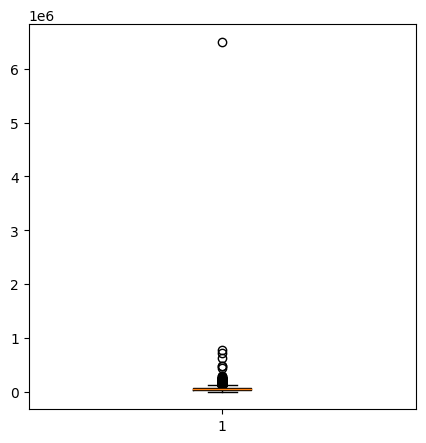

In [ ]:
plt.figure(figsize=(5,5))
plt.boxplot(df_data['Driven'])

In [ ]:
df_data[df_data['Driven']>6000000]

,Brand,Location,Year,Driven,Fuel,Trans,Owner,Mileage,Engine,Power,Seats,Price
2328,BMW,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0


In [ ]:
# 이상치 데이터 평균 값으로 대체
df_data['Driven'][2328] = int(df_data['Driven'].mean())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3fe4644e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3fe4645360>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3fe4644b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3fe46458a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fe4645b40>],
 'means': []}

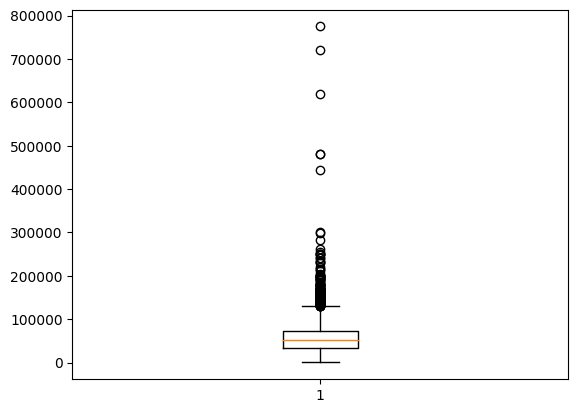

In [ ]:
plt.boxplot(df_data['Driven'])

#4. 원핫인코딩

In [ ]:
pd.get_dummies(df_data, columns = ['Brand', 'Location', 'Fuel', 'Trans', 'Owner'])

,Year,Driven,Mileage,Engine,Power,Seats,Price,Brand_Ambassador,Brand_Audi,Brand_BMW,...,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Trans_Automatic,Trans_Manual,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third
0,2010,72000,43.624,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.670,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.200,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.770,1248.0,88.76,7.0,6.00,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.200,1968.0,140.80,5.0,17.74,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.400,1248.0,74.00,5.0,4.75,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6015,2015,100000,24.400,1120.0,71.00,5.0,4.00,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6016,2012,55000,14.000,2498.0,112.00,8.0,2.90,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6017,2013,46000,18.900,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [ ]:
df_data = pd.get_dummies(df_data, columns = ['Brand', 'Location', 'Fuel', 'Trans', 'Owner'])

In [ ]:
df_data.to_csv('table_sh.csv',index = False)

#5. 머신러닝

In [ ]:
df_data

,Year,Driven,Mileage,Engine,Power,Seats,Price,Brand_Ambassador,Brand_Audi,Brand_BMW,...,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Trans_Automatic,Trans_Manual,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third
0,2010,72000,43.624,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.670,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.200,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.770,1248.0,88.76,7.0,6.00,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.200,1968.0,140.80,5.0,17.74,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.400,1248.0,74.00,5.0,4.75,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6015,2015,100000,24.400,1120.0,71.00,5.0,4.00,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6016,2012,55000,14.000,2498.0,112.00,8.0,2.90,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6017,2013,46000,18.900,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,1,0,1,1,0,0,0


### 1. 선형회귀분석

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_absolute_error

In [ ]:
X = df_data.drop('Price', axis = 1)
y = df_data['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
X_train.shape, X_test.shape

((4110, 56), (1762, 56))

In [ ]:
y_train.shape, y_test.shape

((4110,), (1762,))

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
pred

array([17.51615483, -2.67620464,  2.56717087, ...,  4.54547174,
        0.22257974,  5.66760955])

In [ ]:
print('Train data Accuracy : ', format(lr.score(X_train, y_train)))
print('Test data r-square : ', format(r2_score(y_test,pred)))

Train data Accuracy :  0.7803473912049526
Test data r-square :  0.7790928331981227


In [ ]:
mean_squared_error(y_test, pred) 

27.01339884694638

In [ ]:
mean_absolute_error(y_test, pred)

2.842780161145215

In [ ]:
mean_squared_error(y_test, pred, squared = False)

5.1974415674393475

In [ ]:
# 그래프 그리기